# Thư Viện


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

# Data

In [2]:
import pandas as pd

# Đường dẫn tuyệt đối đến tệp CSV
csv_file_path = 'C:/Users/Long/Documents/GitHub/CarPricePro/CarPricePro-AI/Book1.csv'

# Đọc tệp CSV
df = pd.read_csv(csv_file_path)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Model Xe                             1151 non-null   object 
 1   Năm Sản Xuất                         1151 non-null   int64  
 2   Gía Tiền                             1151 non-null   int64  
 3   Xuất Xứ                              1151 non-null   object 
 4   Tình Trạng                           1151 non-null   int64  
 5   Dòng Xe                              1151 non-null   object 
 6   Số KM Đã Đi                          1151 non-null   int64  
 7   Màu Ngoại Thất                       1151 non-null   object 
 8   Màu Nội Thất                         1151 non-null   object 
 9   Số Chỗ Ngồi                          1151 non-null   int64  
 10  Động Cơ                              1151 non-null   object 
 11  Hệ Thống Nạp Nhiên Liệu       

# Data Processing



Dòng code này tạo một cột mới trong DataFrame có tên là 'Hãng Xe', chứa thông tin về hãng xe từ cột 'Model Xe', thông qua việc tách chuỗi và lấy phần tử đầu tiên.

In [4]:
df['Hãng Xe'] = df['Model Xe'].str.split(' ', n = 1).str[0]

Dòng code này loại bỏ các cột chỉ định trong danh sách columns_to_drop khỏi DataFrame df, và sau đó gán lại kết quả cho biến df.

In [5]:
columns_to_drop = [0, 3, 7, 11, 26]
df = df.drop(columns=df.columns[columns_to_drop])

Dòng code này thay thế nội dung của cột "Động Cơ" trong DataFrame df. Cụ thể, nó thay thế một chuỗi trong cột "Động Cơ" bằng một chuỗi khác, sử dụng biểu thức chính quy (regex). Trong trường hợp này, các loại động cơ như "Diesel", "Điện", "Xăng", "Nhiên liệu linh hoạt" và "Hybrid" sẽ được thay thế bằng chính chúng (sử dụng \1).

In [6]:
df["Động Cơ"] = df["Động Cơ"].str.replace(r'(Diesel|Điện|Xăng|Nhiên liệu linh hoạt|Hybrid).*', r'\1', regex=True)

In [7]:
original_df = df.copy()

In [8]:
# Sử dụng mã hóa số nguyên cho các thuộc tính phân loại
col_cat = ['Dòng Xe', 'Màu Nội Thất', 'Động Cơ', 'Hộp Số', 'Dẫn Động', 'Hãng Xe']
encoding_mapping = {}  # Tạo từ điển để ánh xạ giá trị gốc và giá trị mã hóa
for column in col_cat:
    encoding_mapping[column] = dict(enumerate(original_df[column].astype('category').cat.categories))
    original_df[column] = original_df[column].astype('category').cat.codes

# Tạo mảng kiểu chú giải
legend_array = {}
for column, mapping in encoding_mapping.items():
    legend_array[column] = {code: value for code, value in mapping.items()}


# Xuất kết quả
print("Mảng kiểu chú giải:")
for column, mapping in legend_array.items():
    print(f"{column}: {mapping}")

Mảng kiểu chú giải:
Dòng Xe: {0: 'Convertible', 1: 'Coupe', 2: 'Hatchback', 3: 'Sedan', 4: 'Suv-crossover', 5: 'Truck', 6: 'Van-minivan', 7: 'Wagon'}
Màu Nội Thất: {0: 'Amg cranberry đỏ/đen', 1: 'Amg lụa màu be', 2: 'Atelier châu âu tối', 3: 'Be', 4: 'Bánh quy', 5: 'Bạc', 6: 'Bắp ngô màu be', 7: 'Caramel tráng men', 8: 'Cát', 9: 'Da thú', 10: 'Da trắng', 11: 'Da đen, cao cấp', 12: 'Diesel xám/đen', 13: 'Ferrari màu đỏ', 14: 'Gốm sứ', 15: 'Gỗ mun', 16: 'Java', 17: 'Khối clth', 18: 'Lâu đài', 19: 'Lụa/màu be', 20: 'Macchiato màu be/espresso nâu', 21: 'Macchiato màu be/xám magma', 22: 'Marrakesh nâu', 23: 'Muội than', 24: 'Màu be canberra', 25: 'Màu xám magma/đen', 26: 'Màu xám titan', 27: 'Màu xám tro trung bình', 28: 'Màu xám đen', 29: 'Màu xám đất trung bình', 30: 'Màu xám đậm của palazzo', 31: 'Màu đen nhạt', 32: 'Máy bay phản lực', 33: 'Máy bay phản lực đen', 34: 'Mã não có vân đen', 35: 'Nero', 36: 'Nero vũ trụ', 37: 'Ngà voi', 38: 'Nâu nâu/đen', 39: 'Onyx đen / đá phiến đen trung b

# Choosing Feature


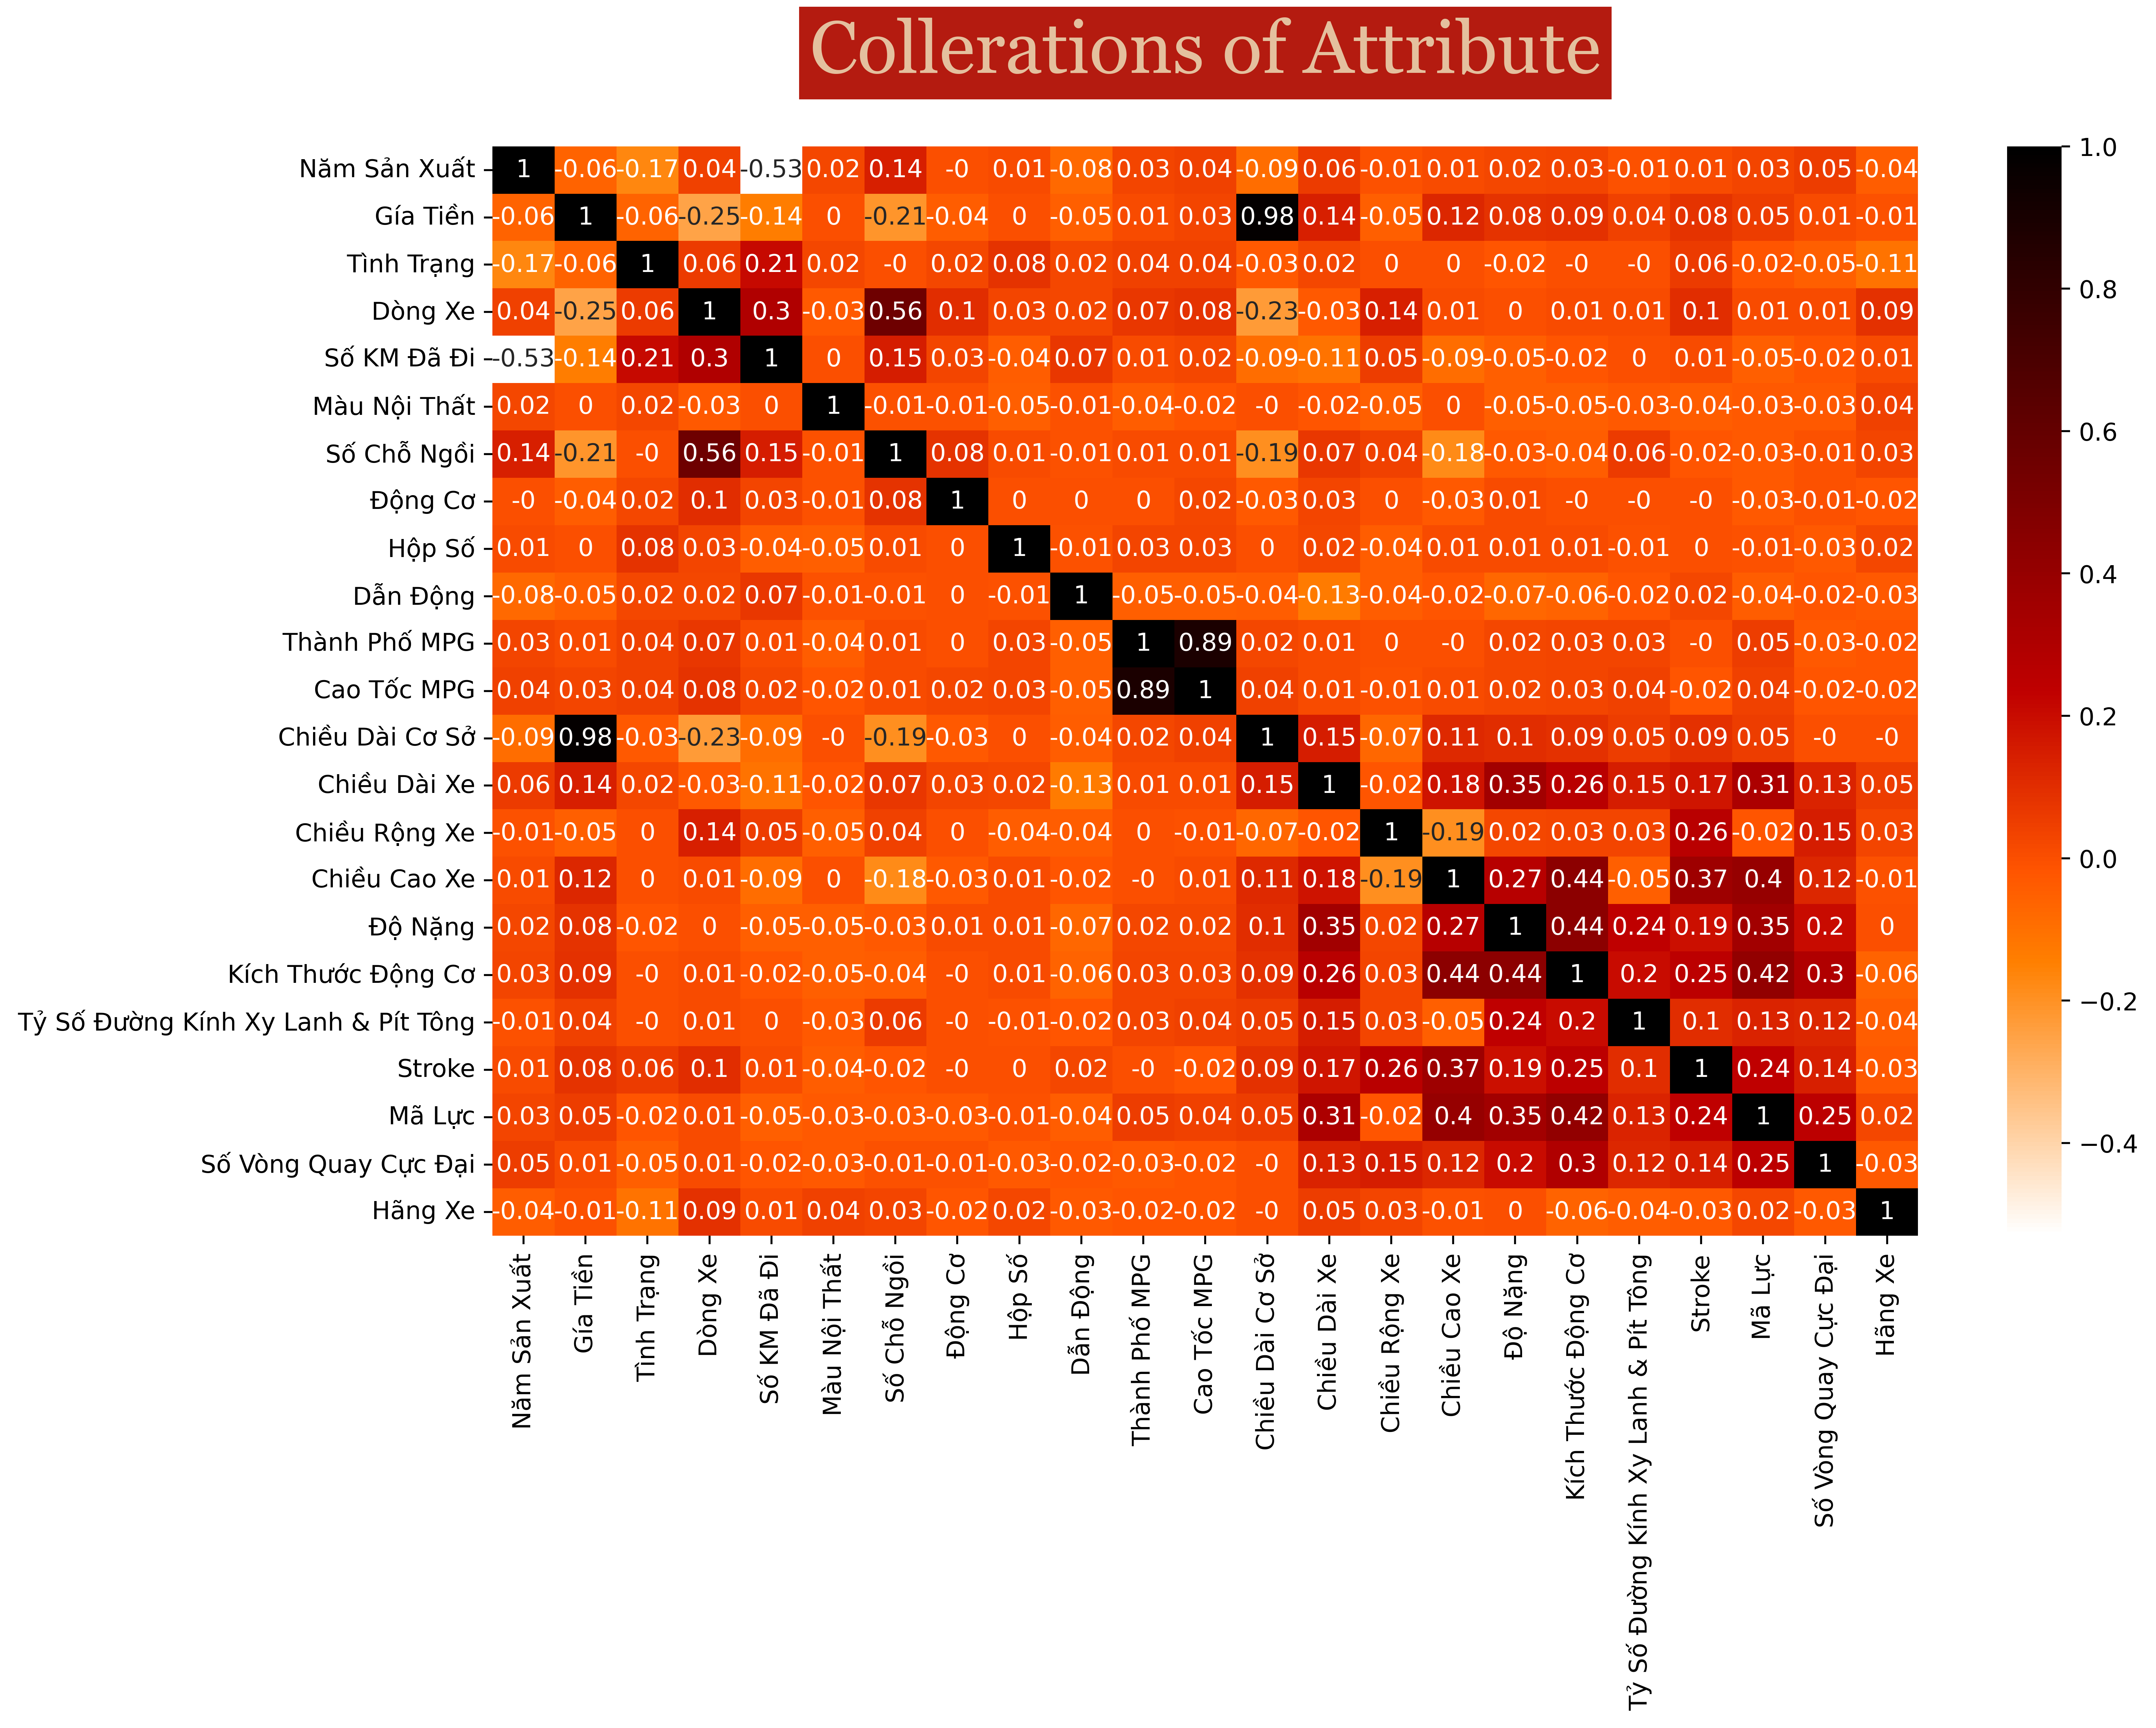

In [9]:
# Ma trận tương quan
FONT = {'fontsize':30, 'fontstyle':'normal', 'fontfamily':'Georgia', 'backgroundcolor':'#B41B10', 'color':'#E4C09E'}
plt.figure(figsize=(13,8), dpi=500)
sns.heatmap(round(original_df.corr(),2), annot=True, cmap='gist_heat_r')
plt.title("Collerations of Attribute", pad=30, fontdict=FONT)
plt.show()

# Model


## Train:Test

In [10]:
selected_columns_X = ['Chiều Dài Cơ Sở', 'Số Chỗ Ngồi', 'Chiều Dài Xe', 'Chiều Cao Xe', 'Hộp Số']
selected_column_y = 'Gía Tiền'

# Create X & y
X = original_df[selected_columns_X]
y = original_df[selected_column_y]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse


def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

In [13]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

## Result


In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
# models = models.append(new_row, ignore_index=True)
# models = pd.concat([models, new_row])

MAE: 300294063.090814
MSE: 2.1520102501576707e+17
RMSE: 463897644.977604
R2 Score: 0.9092987756725863
------------------------------
RMSE Cross-Validation: 629231564.2137486


<Axes: xlabel='Gía Tiền', ylabel='Density'>

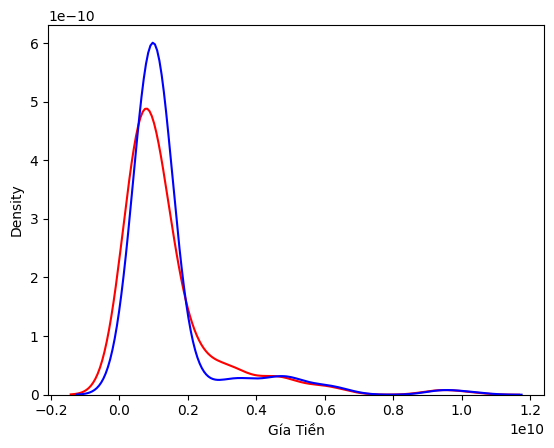

In [15]:
Y_1_pre = lin_reg.predict(X_test)
ax1 = sns.distplot(y_test, hist = False , color='r', label = 'Actual_value')
sns.distplot(Y_1_pre, hist = False , color='b', label = 'fitter_value', ax= ax1)

In [16]:
ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Ridge","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}


MAE: 300289077.24249434
MSE: 2.1520306855942122e+17
RMSE: 463899847.55270314
R2 Score: 0.9092979143759853
------------------------------
RMSE Cross-Validation: 629213146.8772434


<Axes: xlabel='Gía Tiền', ylabel='Density'>

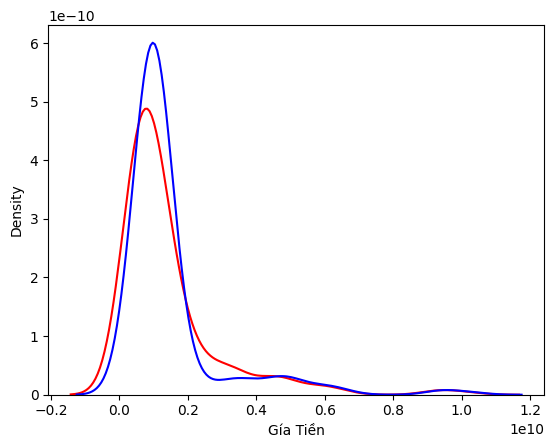

In [17]:
Y_2_pre = ridge.predict(X_test)
ax1 = sns.distplot(y_test, hist = False , color='r', label = 'Actual_value')
sns.distplot(Y_2_pre, hist = False , color='b', label = 'fitter_value', ax= ax1)

In [18]:
# Tạo một DataFrame chứa thông tin điểm dữ liệu test
test_data = pd.DataFrame({
    'Chiều Dài Cơ Sở': [87],      # Thay các giá trị bằng giá trị thực tế
    'Số Chỗ Ngồi': [6],             # Thay các giá trị bằng giá trị thực tế
    'Chiều Dài Xe': [139],          # Thay các giá trị bằng giá trị thực tế
    'Chiều Cao Xe': [73],           # Thay các giá trị bằng giá trị thực tế
    'Hộp Số': [1]
})

# Dự đoán giá tiền cho điểm dữ liệu test
import locale

predicted_price = lin_reg.predict(test_data)
locale.setlocale(locale.LC_ALL, 'vi_VN')
predicted_price = locale.currency(int(predicted_price), grouping=True)
predicted_price = predicted_price.replace(",00", "")
np.set_printoptions(suppress=True)

print("Dự đoán Gía Tiền cho điểm dữ liệu test:", predicted_price)

Dự đoán Gía Tiền cho điểm dữ liệu test: 822.395.290 ₫
